# Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax


loading the Data

In [76]:
data = pd.read_csv(r"C:\Users\Hp\Downloads\data_for_lr.csv")

In [77]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [78]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [79]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [80]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


Data processing

In [81]:
data = data.dropna()
print('Shape of the data: {}'.format (data.shape))

Shape of the data: (699, 2)


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


spliting the data

In [83]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))


Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


<font color = "green"> Linear Regression</font>

Forward propogation

In [84]:
def forward_propagation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]

    predictions = np.multiply(m, train_input) + c

    return predictions

Cost Function

In [85]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) *0.5
    return cost

Gradient decent for backpropagation

In [86]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

Updating Parameters

In [92]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']

    return parameters
    

Model Training

In [93]:
def train(train_input, train_output, learning_rate, iters):
    #random parameters

    parameters = dict()
    parameters['m'] = np.random.uniform(0, 1) * -1
    parameters['c'] = np.random.uniform(0, 1) * -1

    plt.figure()

    #loss
    loss = list()
    
    #iterations
    for i in range(iters):
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost
        cost = cost_function(predictions, train_output)

        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1,cost))

        #plot
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, "+", label = "Original")
        ax.plot(train_input, predictions, "*", label = "Training")

        legend = ax.legend()

        plt.plot(train_input, train_output, "+", label = "Original")
        plt.plot(train_input, predictions, "*", label = "Training")
        plt.show()
        
        #backward propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        #update the parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss






Training

Iteration = 1, Loss = 2063.9764300181214


<Figure size 640x480 with 0 Axes>

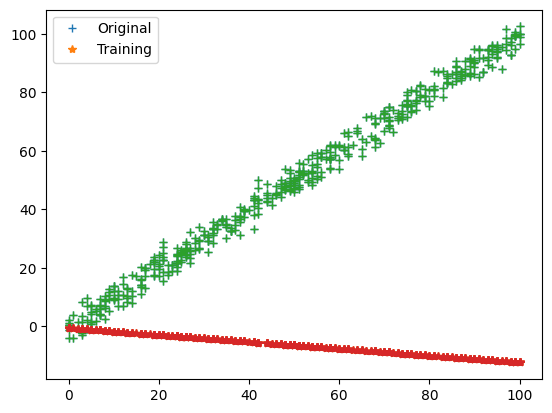

Iteration = 2, Loss = 938.571296463282


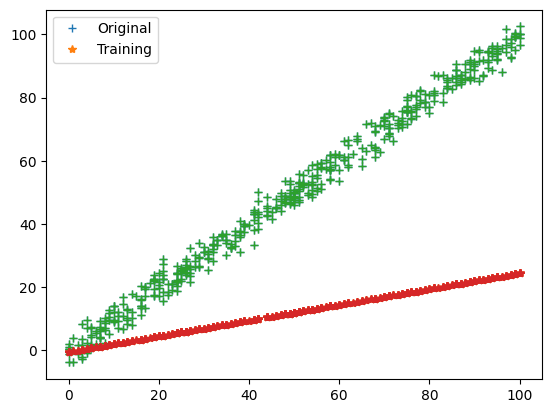

Iteration = 3, Loss = 427.973740487924


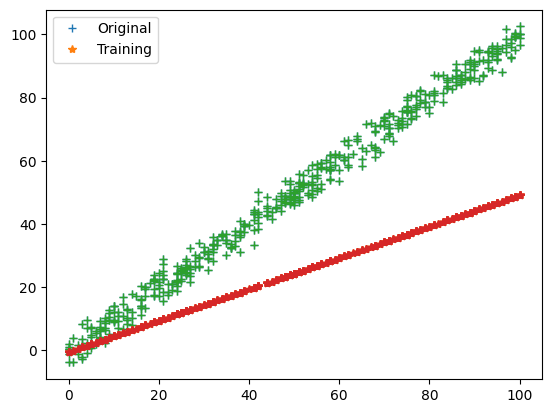

Iteration = 4, Loss = 196.31506344660528


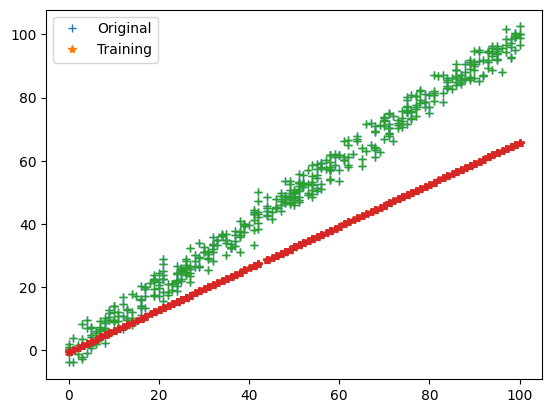

Iteration = 5, Loss = 91.21126474187555


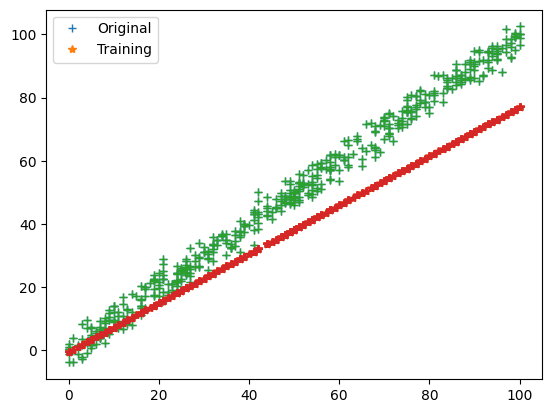

Iteration = 6, Loss = 43.52555451587248


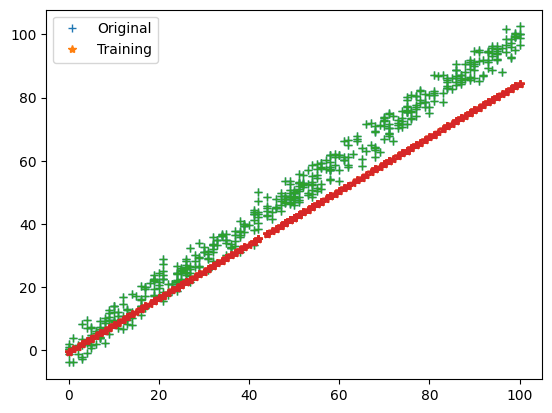

Iteration = 7, Loss = 21.8904946313257


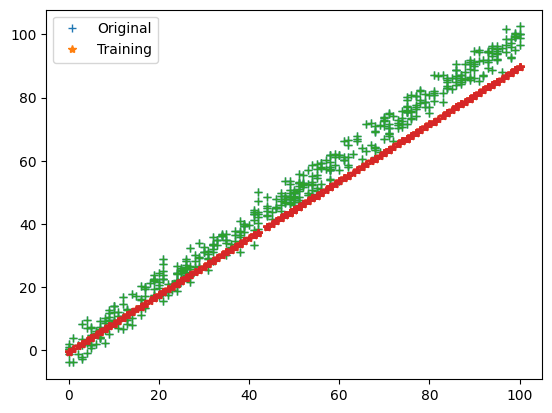

Iteration = 8, Loss = 12.074643661488649


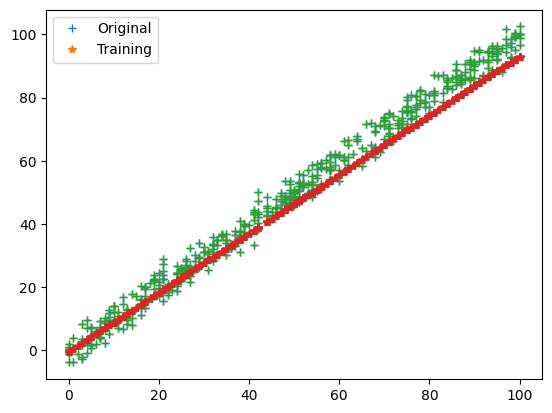

Iteration = 9, Loss = 7.621180867715201


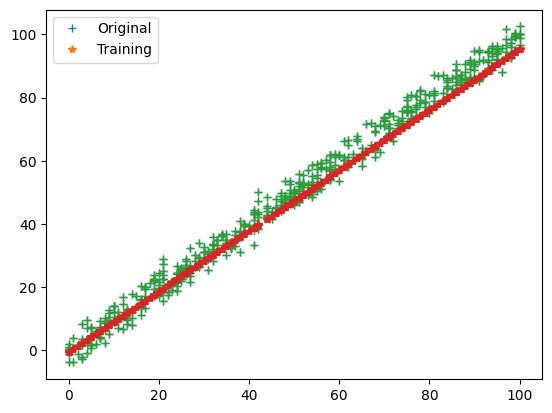

Iteration = 10, Loss = 5.600639529040933


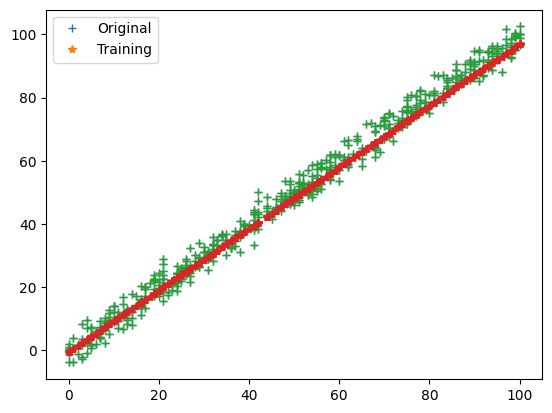

Iteration = 11, Loss = 4.683917349366157


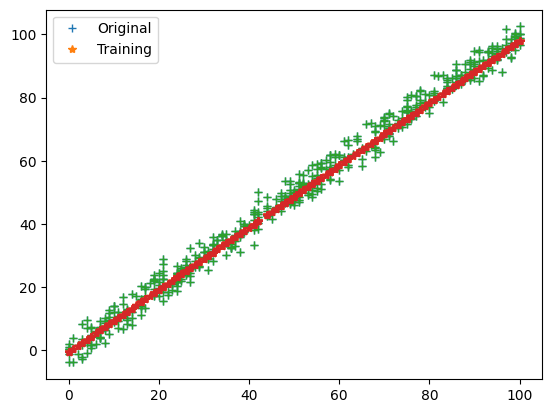

Iteration = 12, Loss = 4.267999144781995


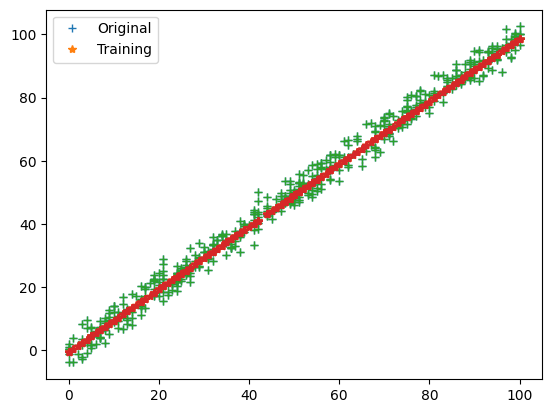

Iteration = 13, Loss = 4.079296258424503


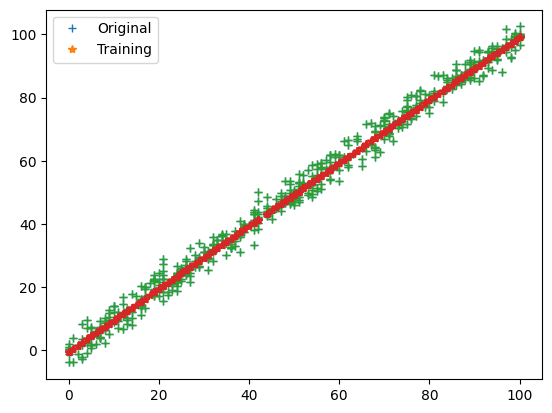

Iteration = 14, Loss = 3.993681213636441


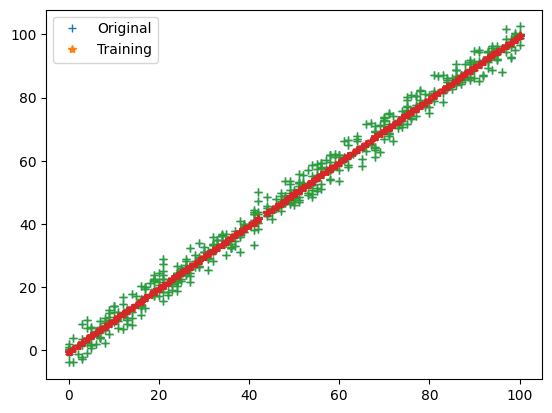

Iteration = 15, Loss = 3.9548372367697113


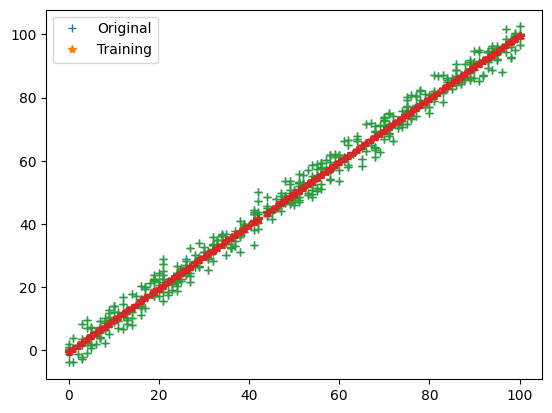

Iteration = 16, Loss = 3.9372133452413856


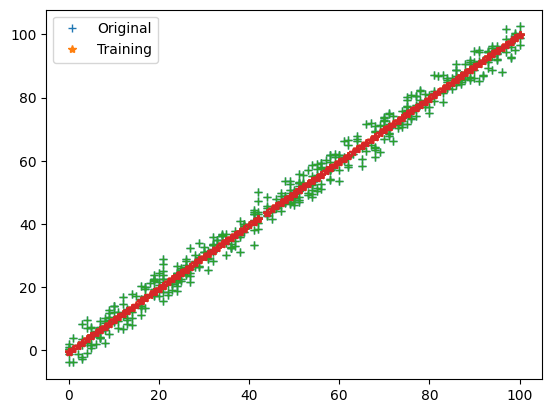

Iteration = 17, Loss = 3.9292170299522713


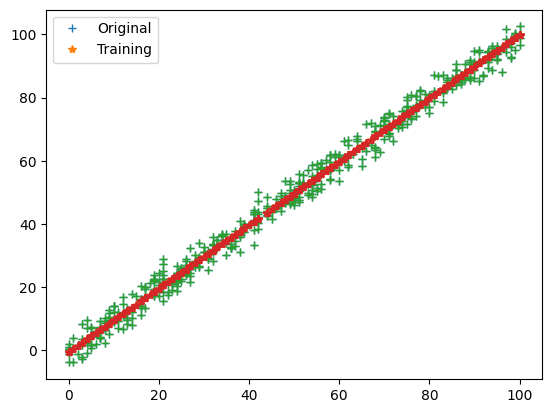

Iteration = 18, Loss = 3.925588756683722


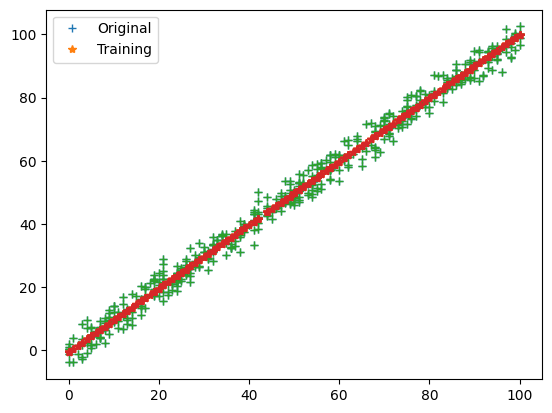

Iteration = 19, Loss = 3.923942268935061


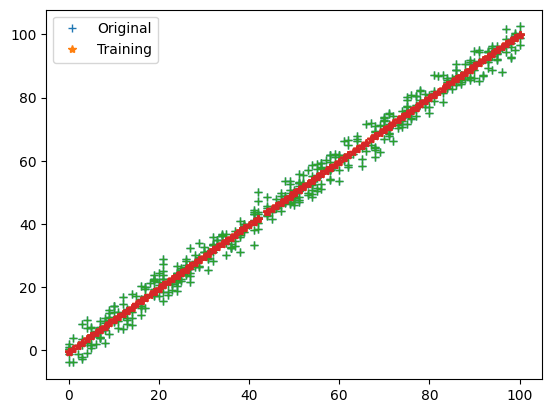

Iteration = 20, Loss = 3.923194919488812


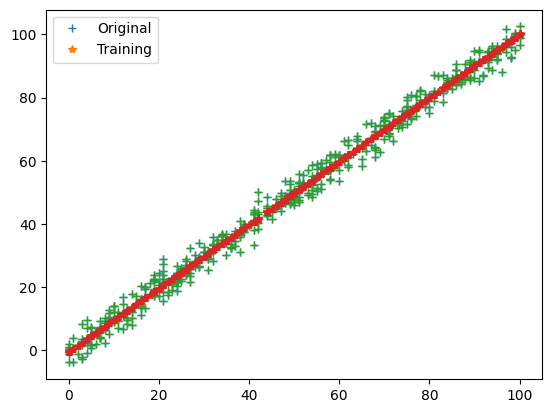

In [94]:
parameters, loss = train(train_input, train_output, 0.0001, 20)